## Exploring Gaming Market Trends: A Data Analysis Project on Steam Store Games

### ASK

#### 1.1 Background:

As a student of Applied Data Analytics at Boston University and a passionate gamer of the Steam platform, I've decided to combine the academic skills with personal interests for my project. 

I'm exploring the gaming industry through data on the Steam platform, aiming to uncover trends and insights that could shape its future.

The goal is to analyze game data from the Steam Store to gain insights into how consumers choose and play games. Hope this analysis of public game data would unlock more opportunities for growth and better user engagement.

#### 1.2 Task:

I'm analyzing the Steam Store dataset to unravel the patterns behind players' game choices, preferences and identify prevailing market trends. The aim of this analysis is to enhance game recommendation algorithms and provide valuable insights for strategic marketing in the gaming industry.

#### 1.3 Objectives:

- Identify the most popular genres of games


- Understand the platform preferences of gamers


- Analyze the relationship between game price and user ratings


- Idnetify the trend of game releases on Steam over the years

#### 1.4 Deliverables:

- Analyze of popular game genres


- Documentation of the cleaning and manipulation phrase of data, such as EDA


- Develop an interactive dashboard to show better visualization for easy understanding the content of analysis


-  The distribution of games by genre and platform, the relationship between price and positive ratings, and the trend of game releases over time


### Prepare & Process

First, we will load the dataset and performed exploratory data analysis, including data cleaning or any extensive preprocessing if needed.

Here is the overview of the dataset:

- **appid**: Unique identifier for each game


- **name**: Name of the game


- **release_date**: Release date of the game


- **english**: Indicator of whether the game is in English (1 = English, 0 = Non-English)


- **developer**: Name of the company or individual that developed the game


- **publisher**: Name of the company that published the game


- **platforms**: Platforms on which the game is available, separated by semicolons


- **required_age**: Minimum age required to play the game


- **categories**: Categories of the game, separated by semicolons


- **genres**: Genres of the game, separated by semicolons


- **steamspy_tags**: Tags associated with the game on SteamSpy, separated by semicolons


- **achievements**: Number of in-game achievements


- **positive_ratings**: Number of positive ratings


- **negative_ratings**: Number of negative ratings


- **average_playtime**: Average playtime in minutes


- **median_playtime**: Median playtime in minutes


- **owners**: Estimated number of owners, given in a range


- **price**: Price of the game in USD

In [1]:
import pandas as pd

# Load the dataset
steam_df = pd.read_csv('steam.csv')

steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [2]:
# Data cleaning
missing_values = steam_df.isnull().sum()

print(f'Missing values in each column:\n{missing_values}')


Missing values in each column:
appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


In [3]:
# Stats
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


#### In-Depth EDA

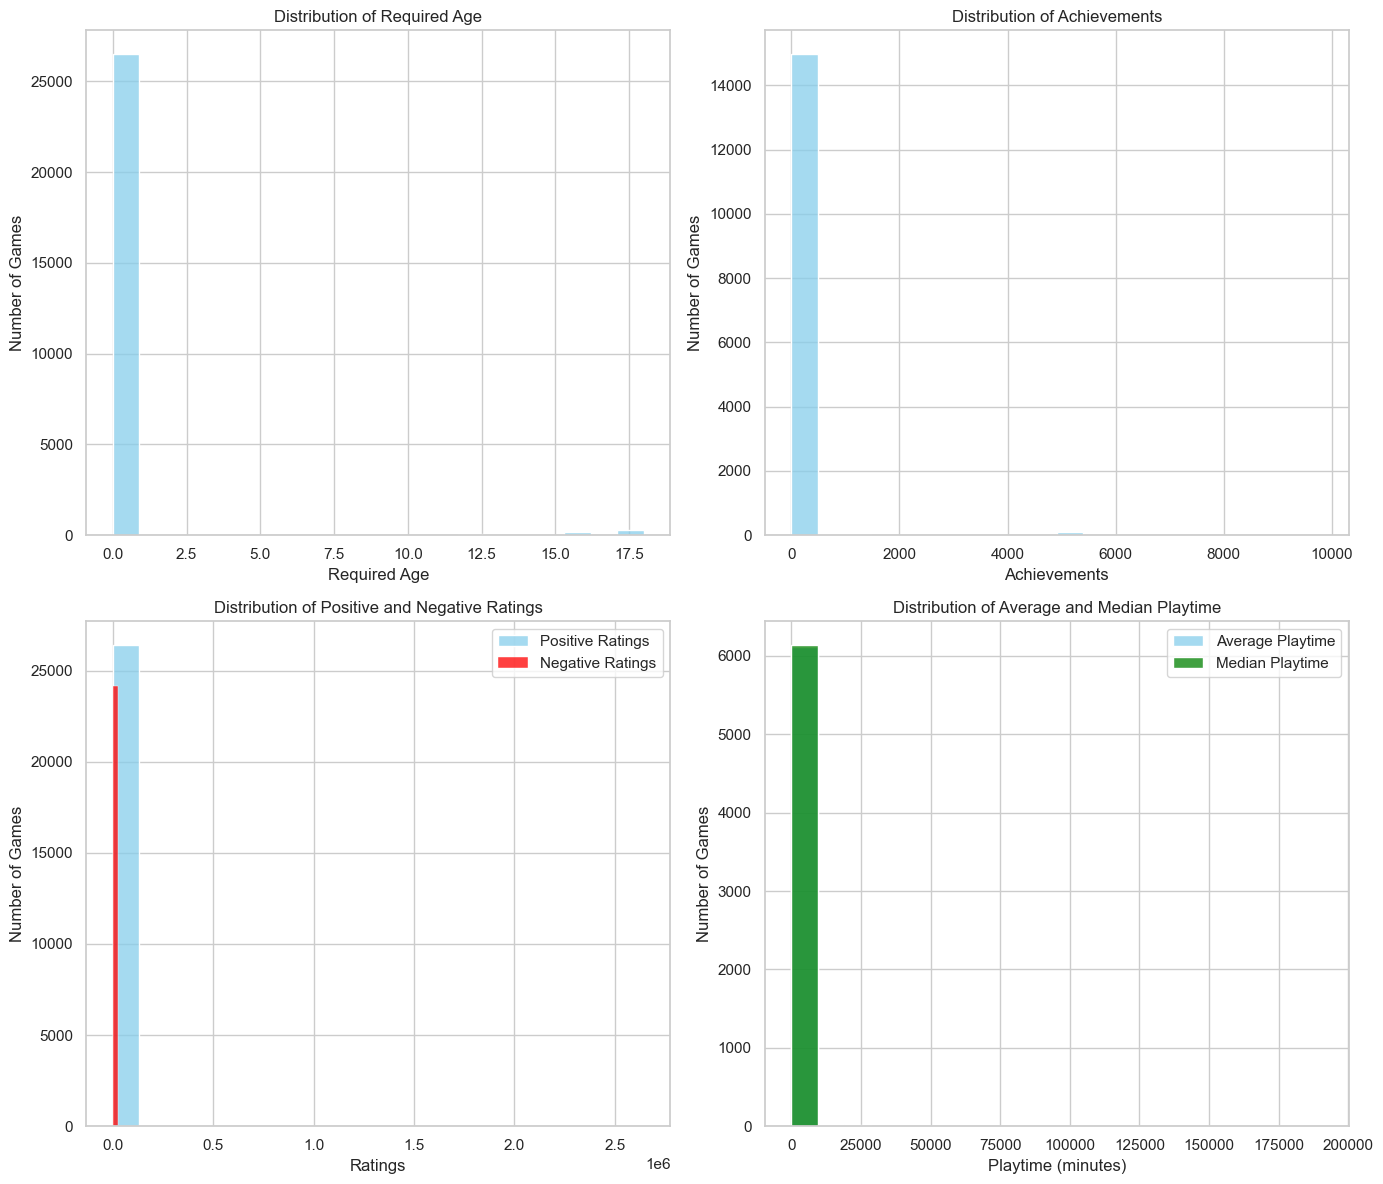

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Distribution of Required Age
sns.histplot(steam_df['required_age'], bins=20, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Required Age')
axs[0, 0].set_xlabel('Required Age')
axs[0, 0].set_ylabel('Number of Games')

# 2. Distribution of Achievements
sns.histplot(steam_df[steam_df['achievements'] > 0]['achievements'], bins=20, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Distribution of Achievements')
axs[0, 1].set_xlabel('Achievements')
axs[0, 1].set_ylabel('Number of Games')

# 3. Positive and Negative Ratings
sns.histplot(steam_df[steam_df['positive_ratings'] > 0]['positive_ratings'], bins=20, ax=axs[1, 0], color='skyblue', label='Positive Ratings')
sns.histplot(steam_df[steam_df['negative_ratings'] > 0]['negative_ratings'], bins=20, ax=axs[1, 0], color='red', label='Negative Ratings')
axs[1, 0].set_title('Distribution of Positive and Negative Ratings')
axs[1, 0].set_xlabel('Ratings')
axs[1, 0].set_ylabel('Number of Games')
axs[1, 0].legend()

# 4. Average and Median Playtime
sns.histplot(steam_df[steam_df['average_playtime'] > 0]['average_playtime'], bins=20, ax=axs[1, 1], color='skyblue', label='Average Playtime')
sns.histplot(steam_df[steam_df['median_playtime'] > 0]['median_playtime'], bins=20, ax=axs[1, 1], color='green', label='Median Playtime')
axs[1, 1].set_title('Distribution of Average and Median Playtime')
axs[1, 1].set_xlabel('Playtime (minutes)')
axs[1, 1].set_ylabel('Number of Games')
axs[1, 1].legend()

# Adjust the layout
plt.tight_layout()
plt.show()


1. **The Distribution of Required Age plot** shows that the majority of games on Steam do not require a specific age to play, meaning they are accessible to a wide range of audiences.


2. **The Distribution of Achievements plot** shows that many games offer a moderate number of achievements, suggesting that this feature is commonly used to engage players.


3. **The Distribution of Positive and Negative Ratings plot** gives a visual representation of how players perceive games on the platform. We can see that there are more positive ratings than negative ones overall, indicating a generally favorable perception of games on Steam.


4. **The Distribution of Average and Median Playtime plot** provides insights into how long games keep players engaged. A large number of games have short playtimes, which could be due to a variety of factors such as game length, difficulty, replayability, and player interest.

### Analyze & Share


In [4]:
# Import required Packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

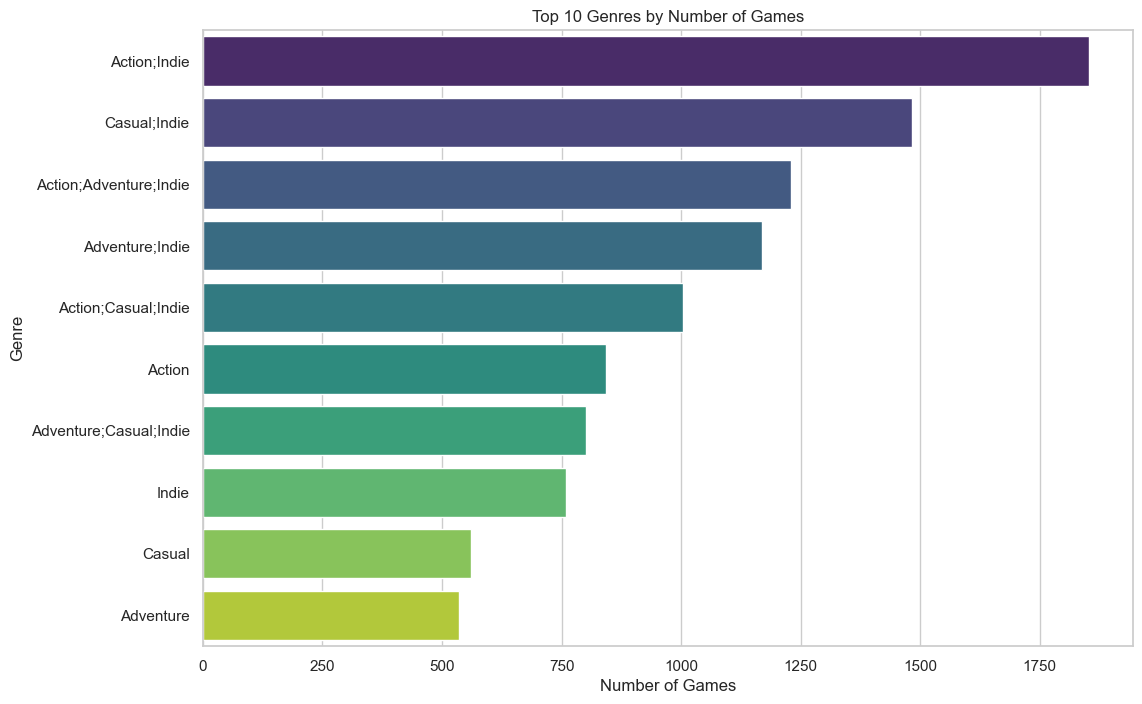

In [7]:
# Define a function to count the occurrences in a column with multiple categories
def count_muticategory(df, column):
    count = Counter(', '.join(df[column]).replace(" ", "").split(','))
    
    return count


# Distribution of games by genre
sns.set(style = 'whitegrid')

genre = count_muticategory(steam_df, 'genres')
top_10_genres = dict(genre.most_common(10))

plt.figure(figsize=(12,8))
sns.barplot(x = list(top_10_genres.values()), y = list(top_10_genres.keys()), palette = 'viridis')
plt.title('Top 10 Genres by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Genre')

plt.show()

**Top 10 Genres by Number of Games:** 

The most common game genre is Indie, followed by Action and Adventure. 

Casual, Strategy, and Simulation games are also fairly common. This suggests that independent developers focusing on these genres can find a significant audience on the Steam platform.

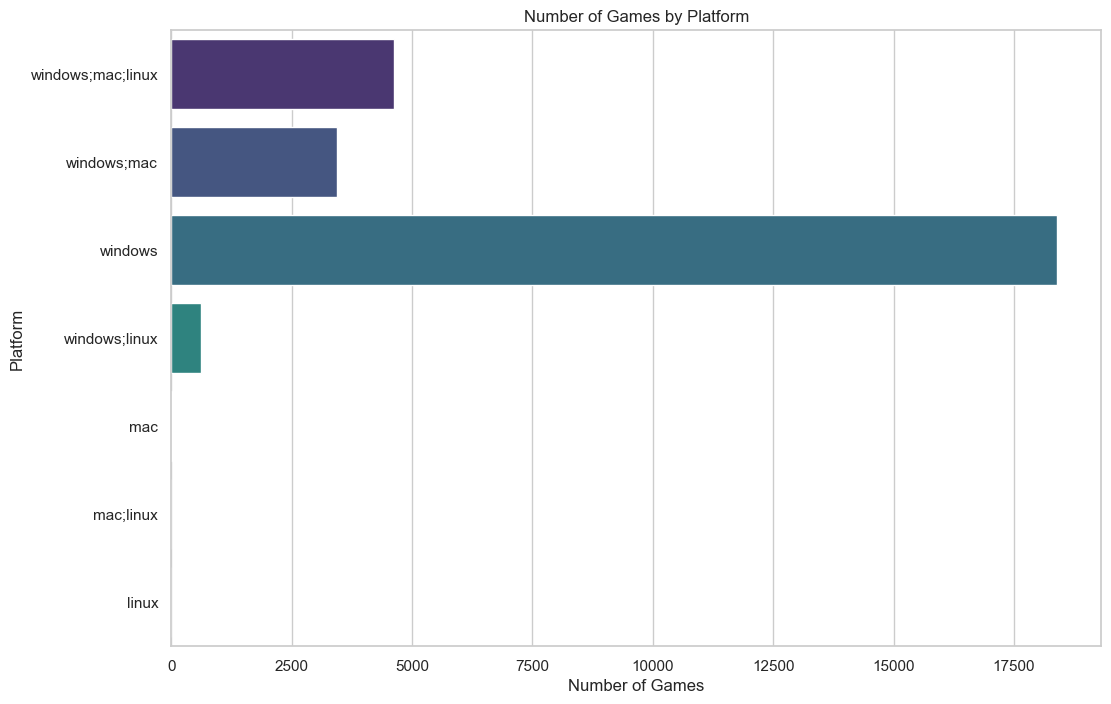

In [11]:
# Distribution of games by platform
platform = count_muticategory(steam_df, 'platforms')

plt.figure(figsize=(12, 8))
sns.barplot(x=list(platform.values()), y=list(platform.keys()), palette='viridis')
plt.title("Number of Games by Platform")
plt.xlabel("Number of Games")
plt.ylabel("Platform")

plt.show()


**Number of Games by Platform:**

The majority of games are developed for the Windows platform. We can observe a significant number are also available on Mac, but fewer games are available on Linux.

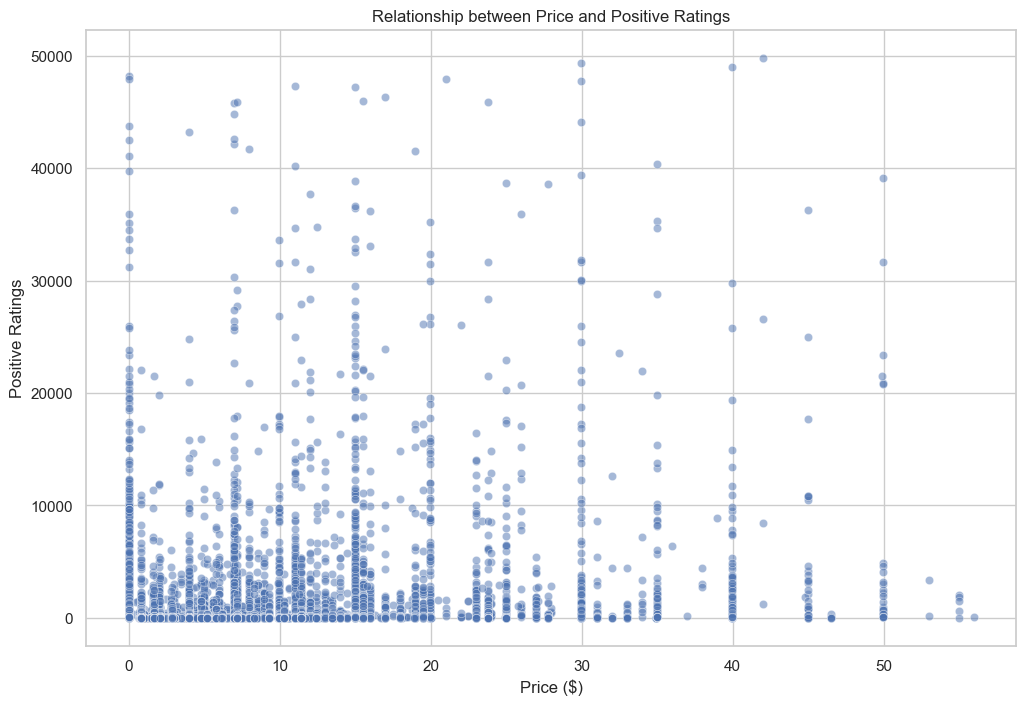

In [12]:
# Relationship between price and positive ratings
# Assumption: we filter the games only with price <= 60 and positive rating <= 50000
steam_df_filtered = steam_df[(steam_df['price'] <= 60) & (steam_df['positive_ratings'] <= 50000)]

plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='positive_ratings', data = steam_df_filtered, alpha=0.5)

plt.title("Relationship between Price and Positive Ratings")
plt.xlabel("Price ($)")
plt.ylabel("Positive Ratings")

plt.show()


**Relationship between Price and Positive Ratings:**

According to the graph above, we don't see a strong correlation between price and positive ratings. There are many games with low prices and high positive ratings, suggesting that a lower price doesn't necessarily result in poorer ratings. 


However, we also see some games with higher prices and relatively few positive ratings.

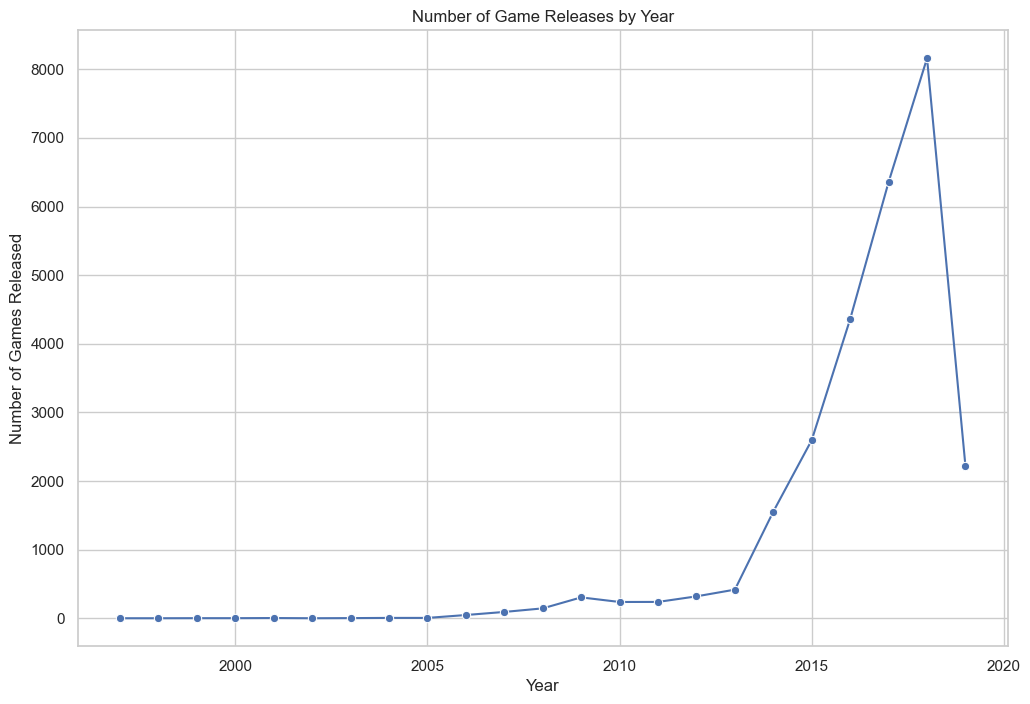

In [13]:
# Trend of game releases over time
# First, we convert release date to datetime and extract year
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['release_year'] = steam_df['release_date'].dt.year

yearly_releases = steam_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,8))
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o')
plt.title("Number of Game Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")

plt.show()


**Number of Game Releases by Year:**

The number of game releases has been increasing almost every year, with a particularly noticeable surge after 2014. This could be due to the rise of independent game developers and the ease of digital distribution on platforms like Steam. The peak was at the year of 2019, showing that much more games are released on that year. 


According to the records, there are more than 8000 games released on 2019. With numerous indie developers finding it challenging to attract attention to their games, it might be beneficial to adopt more strategic approaches. These could include extending release windows or even reducing the total number of games produced to ensure each game receives adequate focus and promotion.


Also, the rising trend for indie games in recent years could also be attributed to an increased demand for such productions. Many individuals, having left established companies, have formed new studios, investing their efforts into the development and production of independent games.

#### Dashboard

In [15]:
!pip install dash

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from collections import Counter

In [19]:
# Create a Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div(children=[
    html.H1(children='Steam Games Dashboard'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='genre-graph',
        figure={
            'data': [
                {'x': list(top_10_genres.keys()), 'y': list(top_10_genres.values()), 'type': 'bar', 'name': 'Games'},
            ],
            'layout': {
                'title': 'Top 10 Genres by Number of Games'
            }
        }
    ),

    dcc.Graph(
        id='release-graph',
        figure={
            'data': [
                {'x': yearly_releases.index, 'y': yearly_releases.values, 'type': 'line', 'name': 'Games'},
            ],
            'layout': {
                'title': 'Number of Game Releases by Year'
            }
        }
    )
])


if __name__ == '__main__':
    app.run_server(debug=True)


### Act

In this step, we are delivering insights and providing recommendations based on the analysis.

**Trends Identified:**

- Action and Indie are the most popular genres, suggesting that these types of games are well-received by players.


- The majority of games are available on the Windows platform, indicating a potential preference or larger market share among gamers.


- There's no strong correlation between price and positive ratings, indicating that higher prices do not necessarily lead to better reception among players.


- The number of game releases has been increasing over the years, showing a growing industry.


**Application to Gamers and Game Developers:**


- Since both game developers and gamers are interested in the features and reception of games, the trends observed in the Steam dataset can provide valuable insights.


**Influence on Game Development and Marketing Strategy:**

- Game developers can focus on Action and Indie genres, which are popular among players. They can also consider developing games for the Windows platform due to its larger market share.


- The lack of correlation between price and positive ratings suggests that players value game quality over price. Developers should therefore focus on improving game quality rather than increasing prices.


- The increasing number of game releases over the years could influence marketing strategies. For instance, marketing efforts could be ramped up during periods of fewer game releases to avoid competition.